In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc

import astropy.units as u
import aplpy
from spectral_cube import SpectralCube
from astropy.io import fits
from reproject import reproject_interp
from astropy.constants import c, k_B, h

from scipy import stats

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
rc('font', **{'family': 'serif'})
rc('text', usetex=True)

In [2]:
snr_min = 5
file_NH2D = 'fit/L1544_NH2D_mscale_2.5arcsec_K.fits'
file_thick_para = 'fit/H-MM1_oNH2D_fit_thick_par_snr{0}.fits'.format(snr_min)
file_thin_para = 'fit/H-MM1_oNH2D_fit_thin_par_snr{0}.fits'.format(snr_min)

file_Tex = 'fits/H-MM1_oNH2D_thick_Tex_snr{0}.fits'.format(snr_min)
file_eTex = 'fits/H-MM1_oNH2D_thick_eTex_snr{0}.fits'.format(snr_min)
file_tau = 'fits/H-MM1_oNH2D_thick_tau_snr{0}.fits'.format(snr_min)
file_etau = 'fits/H-MM1_oNH2D_thick_etau_snr{0}.fits'.format(snr_min)
file_Vlsr = 'fits/H-MM1_oNH2D_thick_Vlsr_snr{0}.fits'.format(snr_min)
file_eVlsr = 'fits/H-MM1_oNH2D_thick_eVlsr_snr{0}.fits'.format(snr_min)
file_dv = 'fits/H-MM1_oNH2D_thick_sigma_v_snr{0}.fits'.format(snr_min)
file_edv = 'fits/H-MM1_oNH2D_thick_esigma_v_snr{0}.fits'.format(snr_min)

# file_cont = 'fits_files/L1544_ACA+Main_1.3mm_mscale_tap_mosaic.fits'
# file_cont_B3 = 'fits_files/L1544_Band3_mfs_natural_tapered_mscale_25.fits'
# file_cont_B3_PB = 'fits_files/L1544_Band3_mfs_natural_tapered_mscale_25_PB.fits'
# file_cont_B6 = 'fits_files/L1544_Band6_mfs_natural_tapered_mscale_25.fits'
# file_cont_B6_PB = 'fits_files/L1544_Band6_mfs_natural_tapered_mscale_25_PB.fits'
# file_cont_B7 = 'fits_files/L1544_Band7_mfs_natural_tapered_mscale_25.fits'
# file_cont_B7_PB = 'fits_files/L1544_Band7_mfs_natural_tapered_mscale_25_PB.fits'
# file_cont_sm = 'fits_files/L1544_ACA+Main_1.3mm_mscale_tap_mosaic_resample.fits'
cont_levels = np.arange(1.2e-4, 7.5e-4, 1.2e-4)

In [3]:
print(fits.getheader(file_thick_para)['BMAJ']*3600)
print(fits.getheader(file_thick_para)['BMIN']*3600)
print(fits.getheader(file_thick_para)['BPA'])
Beam_ALMA = np.sqrt(fits.getheader(file_thick_para)['BMAJ'] * 
                    fits.getheader(file_thick_para)['BMIN'])*u.deg

2.49999999999984
2.49999999999984
0.0


INFO: Auto-setting vmax to  1.761e+02 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting resolution to 93.758 dpi [aplpy.core]


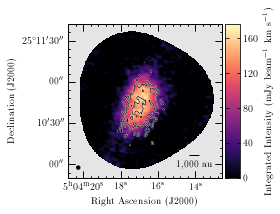

In [57]:
# def setup_plot(fig_i, label_col='black', star_col='red'):
data, hd = fits.getdata('fits_files/L1544_NH2D_mscale_2.5arcsec_TdV_all.fits', header=True)
hdu_mJy = fits.PrimaryHDU( data*1e3, hd)
fig_i=aplpy.FITSFigure(hdu_mJy, figsize=(4,4))
fig_i.show_colorscale(vmin=0, cmap='magma')
# setup_plot(fig0, label_col='white', star_col='black')
#, coords_frame='world')#
#, color='black')
label_col='black'
star_col='red'
fig_i.set_system_latex(True)
fig_i.ticks.set_color(label_col)
# fig_i.recenter(53.075, 30.8299, radius=45*(u.arcsec).to(u.deg))
fig_i.set_nan_color('0.9')
fig_i.add_beam(color=label_col)
distance=135. # pc
ang_size=(1e3/distance)*u.arcsec
fig_i.add_scalebar( ang_size, label='1,000 au', color=label_col)
#
fig_i.tick_labels.set_xformat('hh:mm:ss')
fig_i.tick_labels.set_yformat('dd:mm:ss')
fig_i.ticks.set_length(7)
#
fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
fig_i.axis_labels.set_ytext('Declination (J2000)')

fig_i.add_colorbar()
fig_i.colorbar.set_ticks([0,40,80,120,160])
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='white', linewidths=1.2)
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='black', linewidths=0.7)
fig_i.colorbar.set_axis_label_text('Integrated Intensity (mJy beam$^{-1}$ km s$^{-1}$)')
plt.tight_layout()                                                      

# fig_i.savefig('L1544_NH2D_TdV_2.5_v2.pdf')

INFO: Auto-setting vmax to  1.246e+02 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting resolution to 151.071 dpi [aplpy.core]


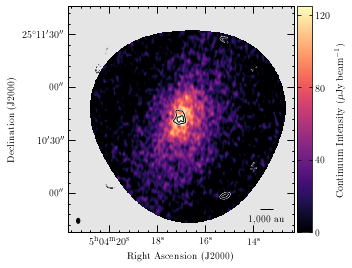

In [5]:
# def setup_plot(fig_i, label_col='black', star_col='red'):
data, hd = fits.getdata('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', header=True)
hdu_muJy = fits.PrimaryHDU( data*1e6, hd)
fig_i=aplpy.FITSFigure(hdu_muJy, figsize=(5,5))
fig_i.show_colorscale(vmin=0, cmap='magma')
# setup_plot(fig0, label_col='white', star_col='black')
#, coords_frame='world')#
#, color='black')
label_col='black'
star_col='red'
fig_i.set_system_latex(True)
fig_i.ticks.set_color(label_col)
# fig_i.recenter(53.075, 30.8299, radius=45*(u.arcsec).to(u.deg))
fig_i.set_nan_color('0.9')
fig_i.add_beam(color=label_col)
distance=135. # pc
ang_size=(1e3/distance)*u.arcsec
fig_i.add_scalebar( ang_size, label='1,000 au', color=label_col)
#
fig_i.tick_labels.set_xformat('hh:mm:ss')
fig_i.tick_labels.set_yformat('dd:mm:ss')
fig_i.ticks.set_length(7)
#
fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
fig_i.axis_labels.set_ytext('Declination (J2000)')

fig_i.add_colorbar()
fig_i.colorbar.set_ticks([0,40,80,120])
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='white', linewidths=1.2)
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='black', linewidths=0.7)
fig_i.colorbar.set_axis_label_text('Continuum Intensity ($\mu$Jy beam$^{-1}$)')

# fig_i.show_contour(file_cont, levels=cont_levels[4:], colors='white', linewidths=2.0)
# fig_i.show_contour(file_cont, levels=cont_levels[4:], colors='black', linewidths=1)

plt.tight_layout()                                                      

# fig_i.savefig('L1544_Band3_continuum.pdf')

In [6]:
fit_para, hd = fits.getdata(file_thick_para, header=True)

In [7]:
hd_2d = hd.copy()
key_list = ['NAXIS3', 'CRPIX3', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3']
for key_i in key_list:
    hd_2d.remove(key_i)
hd_2d['NAXIS'] = 2
hd_2d['WCSAXES'] = 2
fit_para[fit_para == 0] = np.nan
Tex = fit_para[0,:,:]
eTex = fit_para[4,:,:]
tau = fit_para[1,:,:]
etau = fit_para[5,:,:]
Vlsr = fit_para[2,:,:]
eVlsr = fit_para[6,:,:]
dv = fit_para[3,:,:]
edv = fit_para[7,:,:]
#
hd_2d['BUNIT'] = 'K'
fits.writeto(file_Tex, Tex, hd_2d, overwrite=True)
fits.writeto(file_eTex, eTex, hd_2d, overwrite=True)
hd_2d['BUNIT'] = ''
fits.writeto(file_tau, tau, hd_2d, overwrite=True)
fits.writeto(file_etau, etau, hd_2d, overwrite=True)
hd_2d['BUNIT'] = 'km/s'
fits.writeto(file_Vlsr, Vlsr, hd_2d, overwrite=True)
fits.writeto(file_eVlsr, eVlsr, hd_2d, overwrite=True)
hd_2d['BUNIT'] = 'km/s'
fits.writeto(file_dv, dv, hd_2d, overwrite=True)
fits.writeto(file_edv, edv, hd_2d, overwrite=True)

In [8]:
Tau_dv = tau * dv
hd_2d['BUNIT'] = ''
hdu_taudv = fits.PrimaryHDU(Tau_dv, hd_2d)

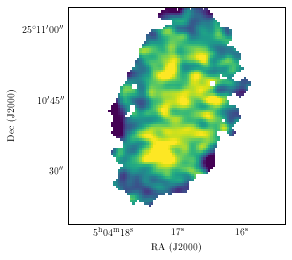

In [9]:
fig = aplpy.FITSFigure(hdu_taudv, figsize=(4,4))
fig.show_colorscale(vmin=0.1, vmax=0.8)
fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))

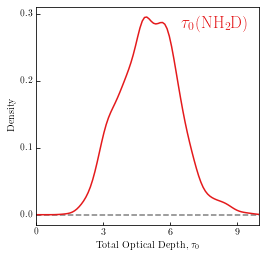

In [10]:
color_kde = '#e41a1c'
xrange = np.array([0, 10])

wt = 1 / etau**2
gd_tau = (tau > 3*etau) & (etau > 0.1)
kde_tau = stats.gaussian_kde(tau[gd_tau], weights=wt[gd_tau])
x_sample = np.linspace(xrange[0], xrange[1], num=100)
tau_sample = np.reshape(kde_tau(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, tau_sample, color=color_kde, label=r'$\tau_0$')
#
ax.text(0.65, 0.9,  r'$\tau_0$(NH$_2$D)', color=color_kde, transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Total Optical Depth, $\tau_{0}$")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)


ax.set_xticks([0, 3, 6, 9])
ax.set_yticks([0, 0.1, 0.2, 0.3])


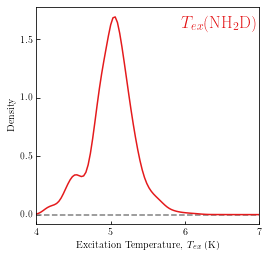

In [11]:
color_kde = '#e41a1c'
xrange_tex = np.array([4, 7])

wt_tex = 1 / eTex**2
kde_tex = stats.gaussian_kde(Tex[gd_tau], weights=wt_tex[gd_tau])
x_sample = np.linspace(xrange_tex[0], xrange_tex[1], num=100)
tex_sample = np.reshape(kde_tex(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xrange_tex, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, tex_sample, color=color_kde, label=r'$\tau_0$')
#
ax.text(0.65, 0.9,  r'$T_{ex}$(NH$_2$D)', color=color_kde, 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Excitation Temperature, $T_{ex}$ (K)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange_tex)


ax.set_xticks([4, 5, 6, 7])
ax.set_yticks([0, 0.5, 1, 1.5])


In [12]:
np.min(Tex[gd_tau]), np.max(Tex[gd_tau])

(4.098988477581498, 6.770159679381743)

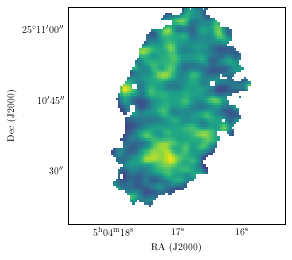

In [13]:
hd_2d['BUNIT'] = ''
tau_clean = tau.copy()
tau_clean[~gd_tau] = np.nan
hdu_tau = fits.PrimaryHDU(tau_clean, hd_2d)

fig = aplpy.FITSFigure(hdu_tau, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=10)
fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))

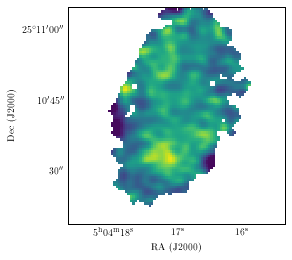

In [14]:
hd_2d['BUNIT'] = ''
hdu_tau = fits.PrimaryHDU(tau, hd_2d)

fig = aplpy.FITSFigure(hdu_tau, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=10)
fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))

In [15]:
np.min(tau[gd_tau]), np.max(tau[gd_tau])

(1.3778150076453872, 9.668296226853942)

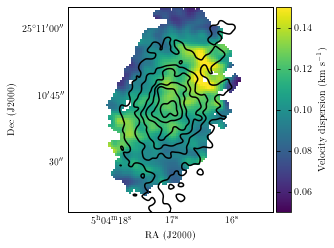

In [16]:
fig = aplpy.FITSFigure(file_dv, figsize=(4,4))
fig.show_colorscale(vmin=0.05, vmax=0.15)
fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))
fig.add_colorbar(axis_label_text=r'Velocity dispersion (km s$^{-1}$)')
# fig.show_contour(file_cont, levels=cont_levels, colors='k')

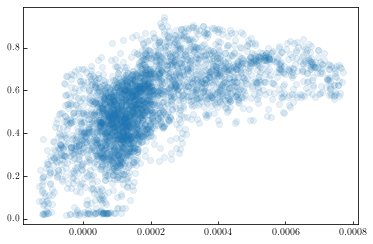

In [27]:
plt.scatter(new_image, Tau_dv, alpha=0.1)

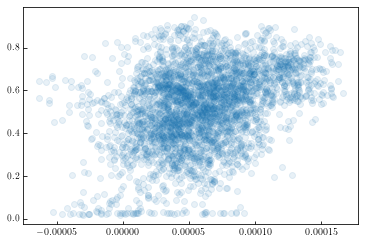

In [28]:
plt.scatter(cont_B3/PB_B3, Tau_dv, alpha=0.1)

(-0.0002, 0.0015)

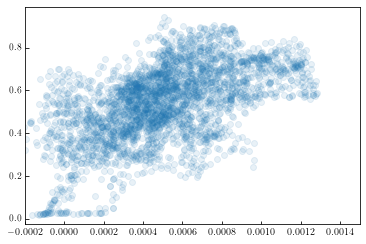

In [29]:
plt.scatter(cont_B6/PB_B6, Tau_dv, alpha=0.1)
plt.xlim(-2e-4, 1.5e-3)

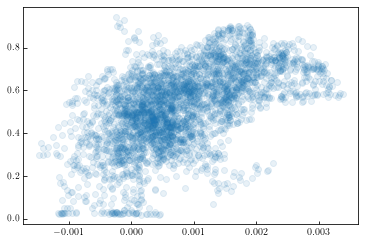

In [30]:
plt.scatter(cont_B7/PB_B7, Tau_dv, alpha=0.1)

In [31]:
def L1544_KDE(my_X, my_Y, ymin=0, ymax=2.5, xmin=-0.0002, xmax=0.0008, get_XY=False):
#     ymin=0
#     ymax=2.5
#     xmin=-0.0002
#     xmax=0.0008
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([my_X, my_Y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    if get_XY == False:
        return Z
    else:
        return X, Y, Z


gd = (Tau_dv > 0.2)
ymin_flux=0
ymax_flux=2.5
xmin_flux=-0.0002
xmax_flux=0.0008
X_KDE, Y_KDE, Z_flux = L1544_KDE(new_image[gd], Tau_dv[gd], 
                                 xmin=xmin_flux, xmax=xmax_flux, ymin=ymin_flux, ymax=ymax_flux, 
                                 get_XY=True)

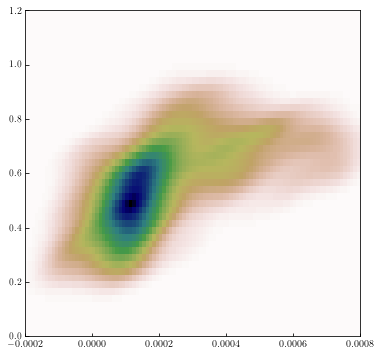

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(Z_flux), cmap=plt.cm.gist_earth_r, 
          extent=[xmin_flux, xmax_flux, ymin_flux, ymax_flux])
ax.set_ylim([ymin_flux, 1.2])
ax.set_xlim([xmin_flux, xmax_flux])
ax.set_aspect('auto')
plt.show()

### Column density calculations

The column density of para-NH$_2$D is determined using the optically thin column density approximation:
$$N({\rm p-NH_2D})_{total} = \frac{8\pi \nu^3}{c^3 A_{ul}} \frac{Q(T_{ex})}{g_u e^{-E_u/kT_{ex}}} \left[e^{h\nu/kT_{ex}}-1\right]^{-1}\int \tau dv~,$$
where
$$ \int \tau dv = \sqrt{2\pi}\ \tau_0 \sigma_v~.$$
This value is consistent with those used by Harju et al. (2017, https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..61H/abstract).

In [33]:
# g_u and E_u values obtained from LAMBDA database
# https://home.strw.leidenuniv.nl/~moldata/datafiles/p-nh2d.dat
gu_p_list = np.array([3.0, 9.0, 9.0, 9.0, 15.0, 15.0, 15.0, 15.0, 15.0,
                    21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0,
                    27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0,
                    33.0, 33.0, 27.0, 27.0, 33.0, 33.0, 33.0])
E_u_p_list = (np.array([0.0, 11.1018, 14.7761, 16.4932, 32.7820, 35.2555,
                     40.4052, 49.8154, 50.3348, 64.2466, 65.6823,
                     75.8736, 83.0973, 85.4414, 104.3779, 104.4807,
                     104.9901, 105.8248, 122.2922, 127.0495, 133.0003,
                     149.5094, 150.1873, 154.9357, 155.5045, 177.2895,
                     177.3063, 178.7962, 181.3445, 192.6501]) 
            * (h*c/k_B) / u.cm).to(u.K)
p_full_index = np.arange(np.size(E_u_p_list))

# g_u and E_u values obtained from LAMBDA database
# https://home.strw.leidenuniv.nl/~moldata/datafiles/o-nh2d.dat
gu_o_list = np.array([9.0, 27.0, 27.0, 27.0, 45.0, 45.0, 45.0, 45.0, 45.0
                    63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 
                    81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
                    99.0, 99.0, 81.0, 81.0, 99.0, 99.0, 99.0])
E_u_o_list = (np.array([0.4059, 11.5063, 14.3725, 16.0925, 33.1852, 34.8518,
                     40.0099, 50.2077, 50.7258, 64.6502, 65.2776,
                     75.4853, 83.4858, 85.8243, 104.0016, 104.1048,    
                     105.3963, 105.4179, 121.9107, 127.4339, 133.3719,
                     149.1397, 149.8199, 155.0938, 155.3460, 177.6453,
                     177.6620, 178.4192, 181.7254, 193.0089]) 
            * (h*c/k_B) / u.cm).to(u.K)
o_full_index = np.arange(np.size(E_u_o_list))

def Q_p_NH2D_i(index, Tex=5*u.K):
    """
    The function returns the individual elements of the partition function:
    the occupancy of each level dependent on degeneracy and energy level 
    for a given excitation temperature. 
    """
    return gu_p_list[index]*np.exp(-E_u_p_list[index]/Tex)


def Q_p_NH2D(Tex=5*u.K):
    """
    It returns the particion function for para-NH2D with an excitation 
    temperature.
    It uses the first 30-energy levels.
    """
    if Tex.size == 1:
        return np.sum(Q_p_NH2D_i(p_full_index, Tex=Tex))
    else:
        Q_p_NH2D_all = Tex.value * 0
        for i in range(Tex.size):
            Q_p_NH2D_all[i] = np.sum(Q_p_NH2D_i(p_full_index, Tex=Tex[i]))
        return Q_p_NH2D_all

    
def Q_o_NH2D_i(index, Tex=5*u.K):
    """
    The function returns the individual elements of the partition function:
    the occupancy of each level dependent on degeneracy and energy level 
    for a given excitation temperature. 
    """
    return gu_o_list[index]*np.exp(-E_u_o_list[index]/Tex)


def Q_o_NH2D(Tex=5*u.K):
    """
    It returns the particion function for ortho-NH2D with an excitation 
    temperature.
    It uses the first 30-energy levels.
    """
    if Tex.size == 1:
        return np.sum(Q_o_NH2D_i(o_full_index, Tex=Tex))
    else:
        Q_o_NH2D_all = Tex.value * 0
        for i in range(Tex.size):
            Q_o_NH2D_all[i] = np.sum(Q_o_NH2D_i(o_full_index, Tex=Tex[i]))
        return Q_o_NH2D_all


def p_NH2D_Column_Density(Tex=5*u.K, sigma_v=0.2*u.km/u.s, tau=2.0):
    """
    Column density determination for the para-NH2D (1_{11}-1{01}) transition.
    The frequency and Einstein coefficient are obtained from LAMBDA database.
    """
    freq = 110.153594*u.GHz
    A_ul = 0.165e-4/u.s
    TdV = np.sqrt(2*np.pi) * tau * sigma_v
    Ncol = (8*np.pi*freq**3/c**3)*Q_p_NH2D(Tex=Tex) / A_ul / Q_p_NH2D_i(2, Tex=Tex) / (np.exp(h*freq/k_B/Tex)-1) * TdV
    return Ncol.to(u.cm**-2)


def o_NH2D_Column_Density(Tex=5*u.K, sigma_v=0.2*u.km/u.s, tau=2.0):
    """
    Column density determination for the ortho-NH2D (1_{11}-1{01}) transition.
    The frequency and Einstein coefficient are obtained from LAMBDA database.
    """
    freq = 85.92627*u.GHz
    A_ul = 0.78e-4/u.s
    TdV = np.sqrt(2*np.pi) * tau * sigma_v
    Ncol = (8*np.pi*freq**3/c**3)*Q_o_NH2D(Tex=Tex) / A_ul / Q_o_NH2D_i(2, Tex=Tex) / (np.exp(h*freq/k_B/Tex)-1) * TdV
    return Ncol.to(u.cm**-2)

def c_tau(tau):
    return tau/(1-np.exp(-tau))


def ALMA_Column_Density(Flux, Td=10*u.K, wave=1*u.mm, kappa_nu=0.01*u.cm**2/u.g, 
                        beam=10*u.arcsec):
    """
    H_2 column density determined using equation A.27 from Kauffman et al. (2008)
    """
    return (2.02e20/u.cm**2 * ((0.01*u.cm**2/u.g) / kappa_nu) * (Flux/u.mJy) * \
           (beam/(10*u.arcsec))**-2 * (wave/u.mm)**3 * \
           (np.exp(1.439*u.mm/wave * 10*u.K/Td) - 1)).to(u.cm**-2)

Here we check the validity of the function by comparing with previous calculations 

In [34]:
gu_list.shape

(30,)

In [35]:
NH2D_Column_Density()

<Quantity 1.12581955e+14 1 / cm2>

In [36]:
NH2D_Column_Density(tau=2.3, Tex=5.9*u.K, sigma_v=0.222/2.355*u.km/u.s)

<Quantity 4.64035251e+13 1 / cm2>

In [37]:
dist_L1544 = 145*u.pc
Td_L1544 = 6.5*u.K
wave_ALMA = 1.3*u.mm
wave_ALMA_B3 = 2.99802*u.mm
wave_ALMA_B6 = 1.3092*u.mm
wave_ALMA_B7 = 0.872784*u.mm
kappa_ALMA = 0.009*u.cm**2/u.g
kappa_ALMA_B3 = 0.009*u.cm**2/u.g
kappa_ALMA_B6 = 0.009*u.cm**2/u.g
kappa_ALMA_B7 = 0.009*u.cm**2/u.g

In [38]:
Tex_mean = Tex[gd].mean() * u.K

In [39]:
L1544_pNH2D_Ncol = NH2D_Column_Density(tau=tau[gd], Tex=Tex_mean, sigma_v=dv[gd]*u.km/u.s)

In [40]:
Tex_col = Tex.copy()
Tex_col[~gd] = Tex_mean
L1544_pNH2D_Ncol_full = NH2D_Column_Density(tau=tau, Tex=Tex_mean, sigma_v=dv*u.km/u.s) * c_tau(tau)

In [41]:
N_H2 = ALMA_Column_Density(new_image[gd]*u.Jy, Td=Td_L1544, wave=wave_ALMA, kappa_nu=kappa_ALMA, beam=Beam_ALMA)

In [42]:
c_tau(tau[gd]).max()

9.668907858180223

In [43]:
N_H2.max()

<Quantity 2.73022238e+22 1 / cm2>

In [44]:
N_H2_B6 = ALMA_Column_Density(cont_B6[gd]*u.Jy, Td=Td_L1544, wave=wave_ALMA_B6, kappa_nu=kappa_ALMA_B6, beam=Beam_ALMA_B6)

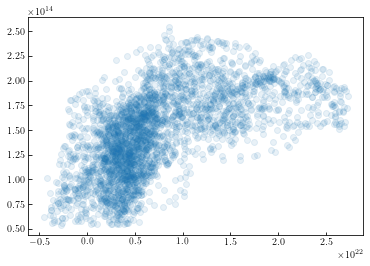

In [45]:
plt.scatter(N_H2, L1544_pNH2D_Ncol, alpha=0.1)

In [46]:
ymin_col=0
ymax_col=6e14
xmin_col=-1e22
xmax_col=5e22
X_col_KDE, Y_col_KDE, Z_col = L1544_KDE(N_H2, L1544_pNH2D_Ncol, 
                                        xmin=xmin_col, xmax=xmax_col, ymin=ymin_col, ymax=ymax_col,
                                        get_XY=True)

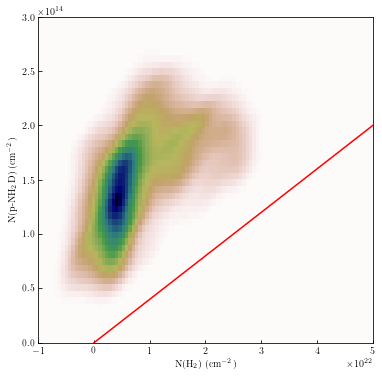

In [47]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(Z_col), cmap=plt.cm.gist_earth_r, 
          extent=[xmin_col, xmax_col, ymin_col, ymax_col])
ax.set_ylim([ymin_col, 3e14])
ax.set_xlim([xmin_col, xmax_col])
ax.set_aspect('auto')
ax.set_xlabel(r'N(H$_2$) (cm$^{-2}$)')
ax.set_ylabel(r'N(p-NH$_2$D) (cm$^{-2}$)')
x_sample = np.array([0,xmax_col])
ax.plot(x_sample, x_sample*4e-9, color='red')
plt.show()

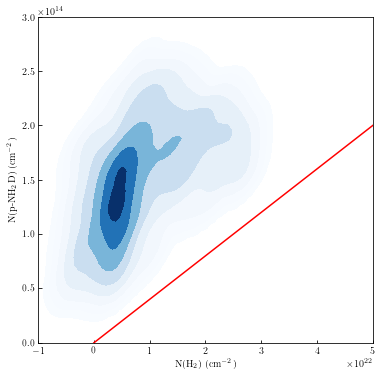

In [48]:
fig, ax = plt.subplots(figsize=(6,6))

levels = np.append(np.exp(-0.5 * np.arange(0.5, 4.1, 0.5) ** 2)[::-1] * Z_col.max(), [1.0])
ax.contourf(X_col_KDE, Y_col_KDE, Z_col, cmap='Blues', 
            levels=levels, vmin=0., vmax=Z_col.max())#,
#             extent=[xmin_col, xmax_col, ymin_col, ymax_col])
ax.set_ylim([ymin_col, 3e14])
ax.set_xlim([xmin_col, xmax_col])
ax.set_aspect('auto')
ax.set_xlabel(r'N(H$_2$) (cm$^{-2}$)')
ax.set_ylabel(r'N(p-NH$_2$D) (cm$^{-2}$)')
x_sample = np.array([0,xmax_col])
ax.plot(x_sample, x_sample*4e-9, color='red')
plt.show()

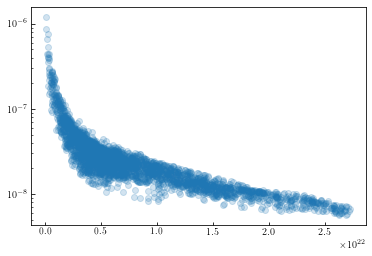

In [49]:
gd_i = (N_H2 > 0.01e22/u.cm**2) #& gd_tau
plt.scatter( N_H2[gd_i], (L1544_pNH2D_Ncol/N_H2)[gd_i], alpha=0.2)
plt.yscale('log')

INFO: Auto-setting vmax to  2.283e+02 [aplpy.core]


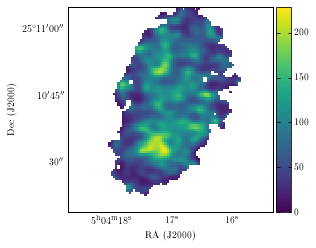

In [50]:
hd_2d['BUNIT'] = ''
NH2D_clean = L1544_pNH2D_Ncol_full.copy()
NH2D_clean[~gd_tau] = np.nan
hdu_NH2D = fits.PrimaryHDU(NH2D_clean/1e13, hd_2d)

fig = aplpy.FITSFigure(hdu_NH2D, figsize=(4,4))
fig.show_colorscale(vmin=0)#, vmax=10)
fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))
fig.add_colorbar()

INFO: Auto-setting vmax to  2.414e+02 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting resolution to 38.5077 dpi [aplpy.core]


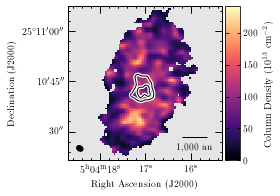

In [56]:
# def setup_plot(fig_i, label_col='black', star_col='red'):
hd_2d['BUNIT'] = ''
NH2D_clean = L1544_pNH2D_Ncol_full.copy()
NH2D_clean[~gd_tau] = np.nan
hdu_NH2D = fits.PrimaryHDU(NH2D_clean/1e13, hd_2d)

fig_i=aplpy.FITSFigure(hdu_NH2D, figsize=(4,4))
fig_i.show_colorscale(vmin=0, cmap='magma')
# fig_i.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))
fig_i.recenter(76.0709, 25.1790, radius=23*(u.arcsec).to(u.deg))
# setup_plot(fig0, label_col='white', star_col='black')
#, coords_frame='world')#
#, color='black')
label_col='black'
star_col='red'
fig_i.set_system_latex(True)
fig_i.ticks.set_color(label_col)
# fig_i.recenter(53.075, 30.8299, radius=45*(u.arcsec).to(u.deg))
fig_i.set_nan_color('0.9')
fig_i.add_beam(color=label_col)
distance=135. # pc
ang_size=(1e3/distance)*u.arcsec
fig_i.add_scalebar( ang_size, label='1,000 au', color=label_col)
#
fig_i.tick_labels.set_xformat('hh:mm:ss')
fig_i.tick_labels.set_yformat('dd:mm:ss')
fig_i.ticks.set_length(7)
#
fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
fig_i.axis_labels.set_ytext('Declination (J2000)')

fig_i.add_colorbar()
# fig_i.colorbar.set_ticks([0,40,80,120,160])
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='white', linewidths=1.2)
# fig_i.show_contour('L1544_Band3_ACA+12m_mfs_natural_mscale_v2.fits', levels=1e-5*np.array([5,10]), colors='black', linewidths=0.7)
fig_i.colorbar.set_axis_label_text('Column Density (10$^{13}$ cm$^{-2}$)')

fig_i.show_contour(file_cont, levels=cont_levels[4:], colors='white', linewidths=3.5)
fig_i.show_contour(file_cont, levels=cont_levels[4:], colors='black', linewidths=1)

plt.tight_layout()                                                      

fig_i.savefig('L1544_NH2D_Ncol_v2.pdf')

In [52]:
np.nanmin(NH2D_clean)

<Quantity 7.69180614e+13 1 / cm2>

In [53]:
Ntot= np.sum(N_H2[gd_i])* np.abs(fits.getheader(file_thick_para)['CDELT1']*fits.getheader(file_thick_para)['CDELT2']) *(np.pi/180 * dist_L1544)**2

In [54]:
(Ntot * 2.8 * u.u).to(u.Msun)

<Quantity 0.06527462 solMass>

In [55]:
np.nansum(new_image)

0.5411114686021256

In [56]:
np.nanmax(new_image)*1e3

4.423706353896821

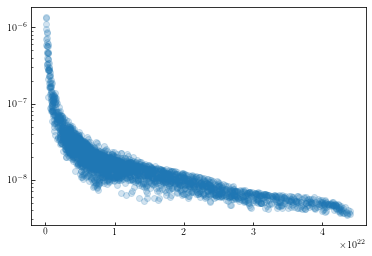

In [57]:
gd_i = (N_H2_B6 > 0.01e22/u.cm**2)
plt.scatter( N_H2_B6[gd_i], (L1544_pNH2D_Ncol/N_H2_B6)[gd_i], alpha=0.2)
plt.yscale('log')

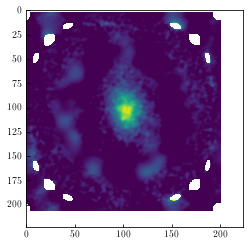

In [58]:
plt.imshow(new_image, vmin=0, vmax=0.8e-3)